In [122]:
! pip install spacy
! pip install WordCloud
import numpy as np 
import pandas as pd 
import string 
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

#### Reading dataset

In [124]:
data=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


#### No.of words in each tweet

In [125]:
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


#### No.of characters in each tweet

In [126]:
data['char_count'] = data['Text'].str.len() 
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


#### No.of stopwords

In [127]:
!pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [128]:
data['stopwords'].sum()  

5189

In [129]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


##### Normalize data

In [130]:
data['Text'] = data['Text'].str.lower()
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

#### Removing special characters

In [131]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

C:\Users\prana\AppData\Local\Temp\ipykernel_34908\1947507549.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

#### Removing stopwords

In [132]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

#### Tokenization

In [133]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
tweets=np.array(data['Text'])
s=str(tweets)
s

"['kunalb11 im alien'\n 'id_aa_carmack ray tracing cyberpunk hdr nextlevel tried'\n 'joerogan spotify great interview' ...\n 'teslagong ppathole samwise gamgee'\n 'ppathole altho dumb dumber u0001f525u0001f525'\n 'progress update august 28']"

In [135]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(s)
print(text_tokens)

['[', "'kunalb11", 'im', "alien'", "'id_aa_carmack", 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', "tried'", "'joerogan", 'spotify', 'great', 'interview', "'", '...', "'teslagong", 'ppathole', 'samwise', "gamgee'", "'ppathole", 'altho', 'dumb', 'dumber', "u0001f525u0001f525'", "'progress", 'update', 'august', '28', "'", ']']


#### Stemming

In [136]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                     joerogan spotifi great interview
3                              gtera27 doge underestim
4    teslacn congratul tesla china amaz execut last...
Name: Text, dtype: object

#### lemmatization

In [137]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
lemmatized_words=[lemmatizer.lemmatize(word) for word in data['Text']]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [138]:
print(lemmatized_words)

['kunalb11 im alien', 'id_aa_carmack ray tracing cyberpunk hdr nextlevel tried', 'joerogan spotify great interview', 'gtera27 doge underestimated', 'teslacn congratulations tesla china amazing execution last year next even', 'happy new year ox httpstco9wfkmyu2oj', 'frodo underdoge thought would fail httpstcozgxjfdzzrm', 'owensparks_ flcnhvy anonyx10 haha thanks', 'flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation', 'entertaining outcome likely', 'givedirectly sent', 'agree clubhouse kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley unrealengine getting real', 'bought dogecoin lil x toddler hodler', 'joshmanmode definitely issues sentencing seems bit high', 'freewalletorg thanks fixing', 'freewalletorg please unlock account', 'astrojordy u0001f923u0001f923', 'true power haha httpstcofc9uhqsd7o', 'freewalletorg crypto wallet wont give private keys avoided costs', 'freewalletorg app sucks', 'rt spacex nasa selected falcon heavy launch first two elements lunar ga

#### Wordcloud of tweets

In [139]:
tweets=''.join(data['Text'])
tweets

'kunalb11 im alienid_aa_carmack ray tracing cyberpunk hdr nextlevel triedjoerogan spotify great interviewgtera27 doge underestimatedteslacn congratulations tesla china amazing execution last year next evenhappy new year ox httpstco9wfkmyu2ojfrodo underdoge thought would fail httpstcozgxjfdzzrmowensparks_ flcnhvy anonyx10 haha thanksflcnhvy anonyx10 indeed tweets definitely represent realworld time allocationentertaining outcome likelygivedirectly sentagree clubhouse kanyewesthttpstco3rwe9uhstsgeoffkeighley unrealengine getting realbought dogecoin lil x toddler hodlerjoshmanmode definitely issues sentencing seems bit highfreewalletorg thanks fixingfreewalletorg please unlock accountastrojordy u0001f923u0001f923true power haha httpstcofc9uhqsd7ofreewalletorg crypto wallet wont give private keys avoided costsfreewalletorg app sucksrt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission httpstco3pwtajtourville yesblkmdl3 rationaletienne adamklotz_ 

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

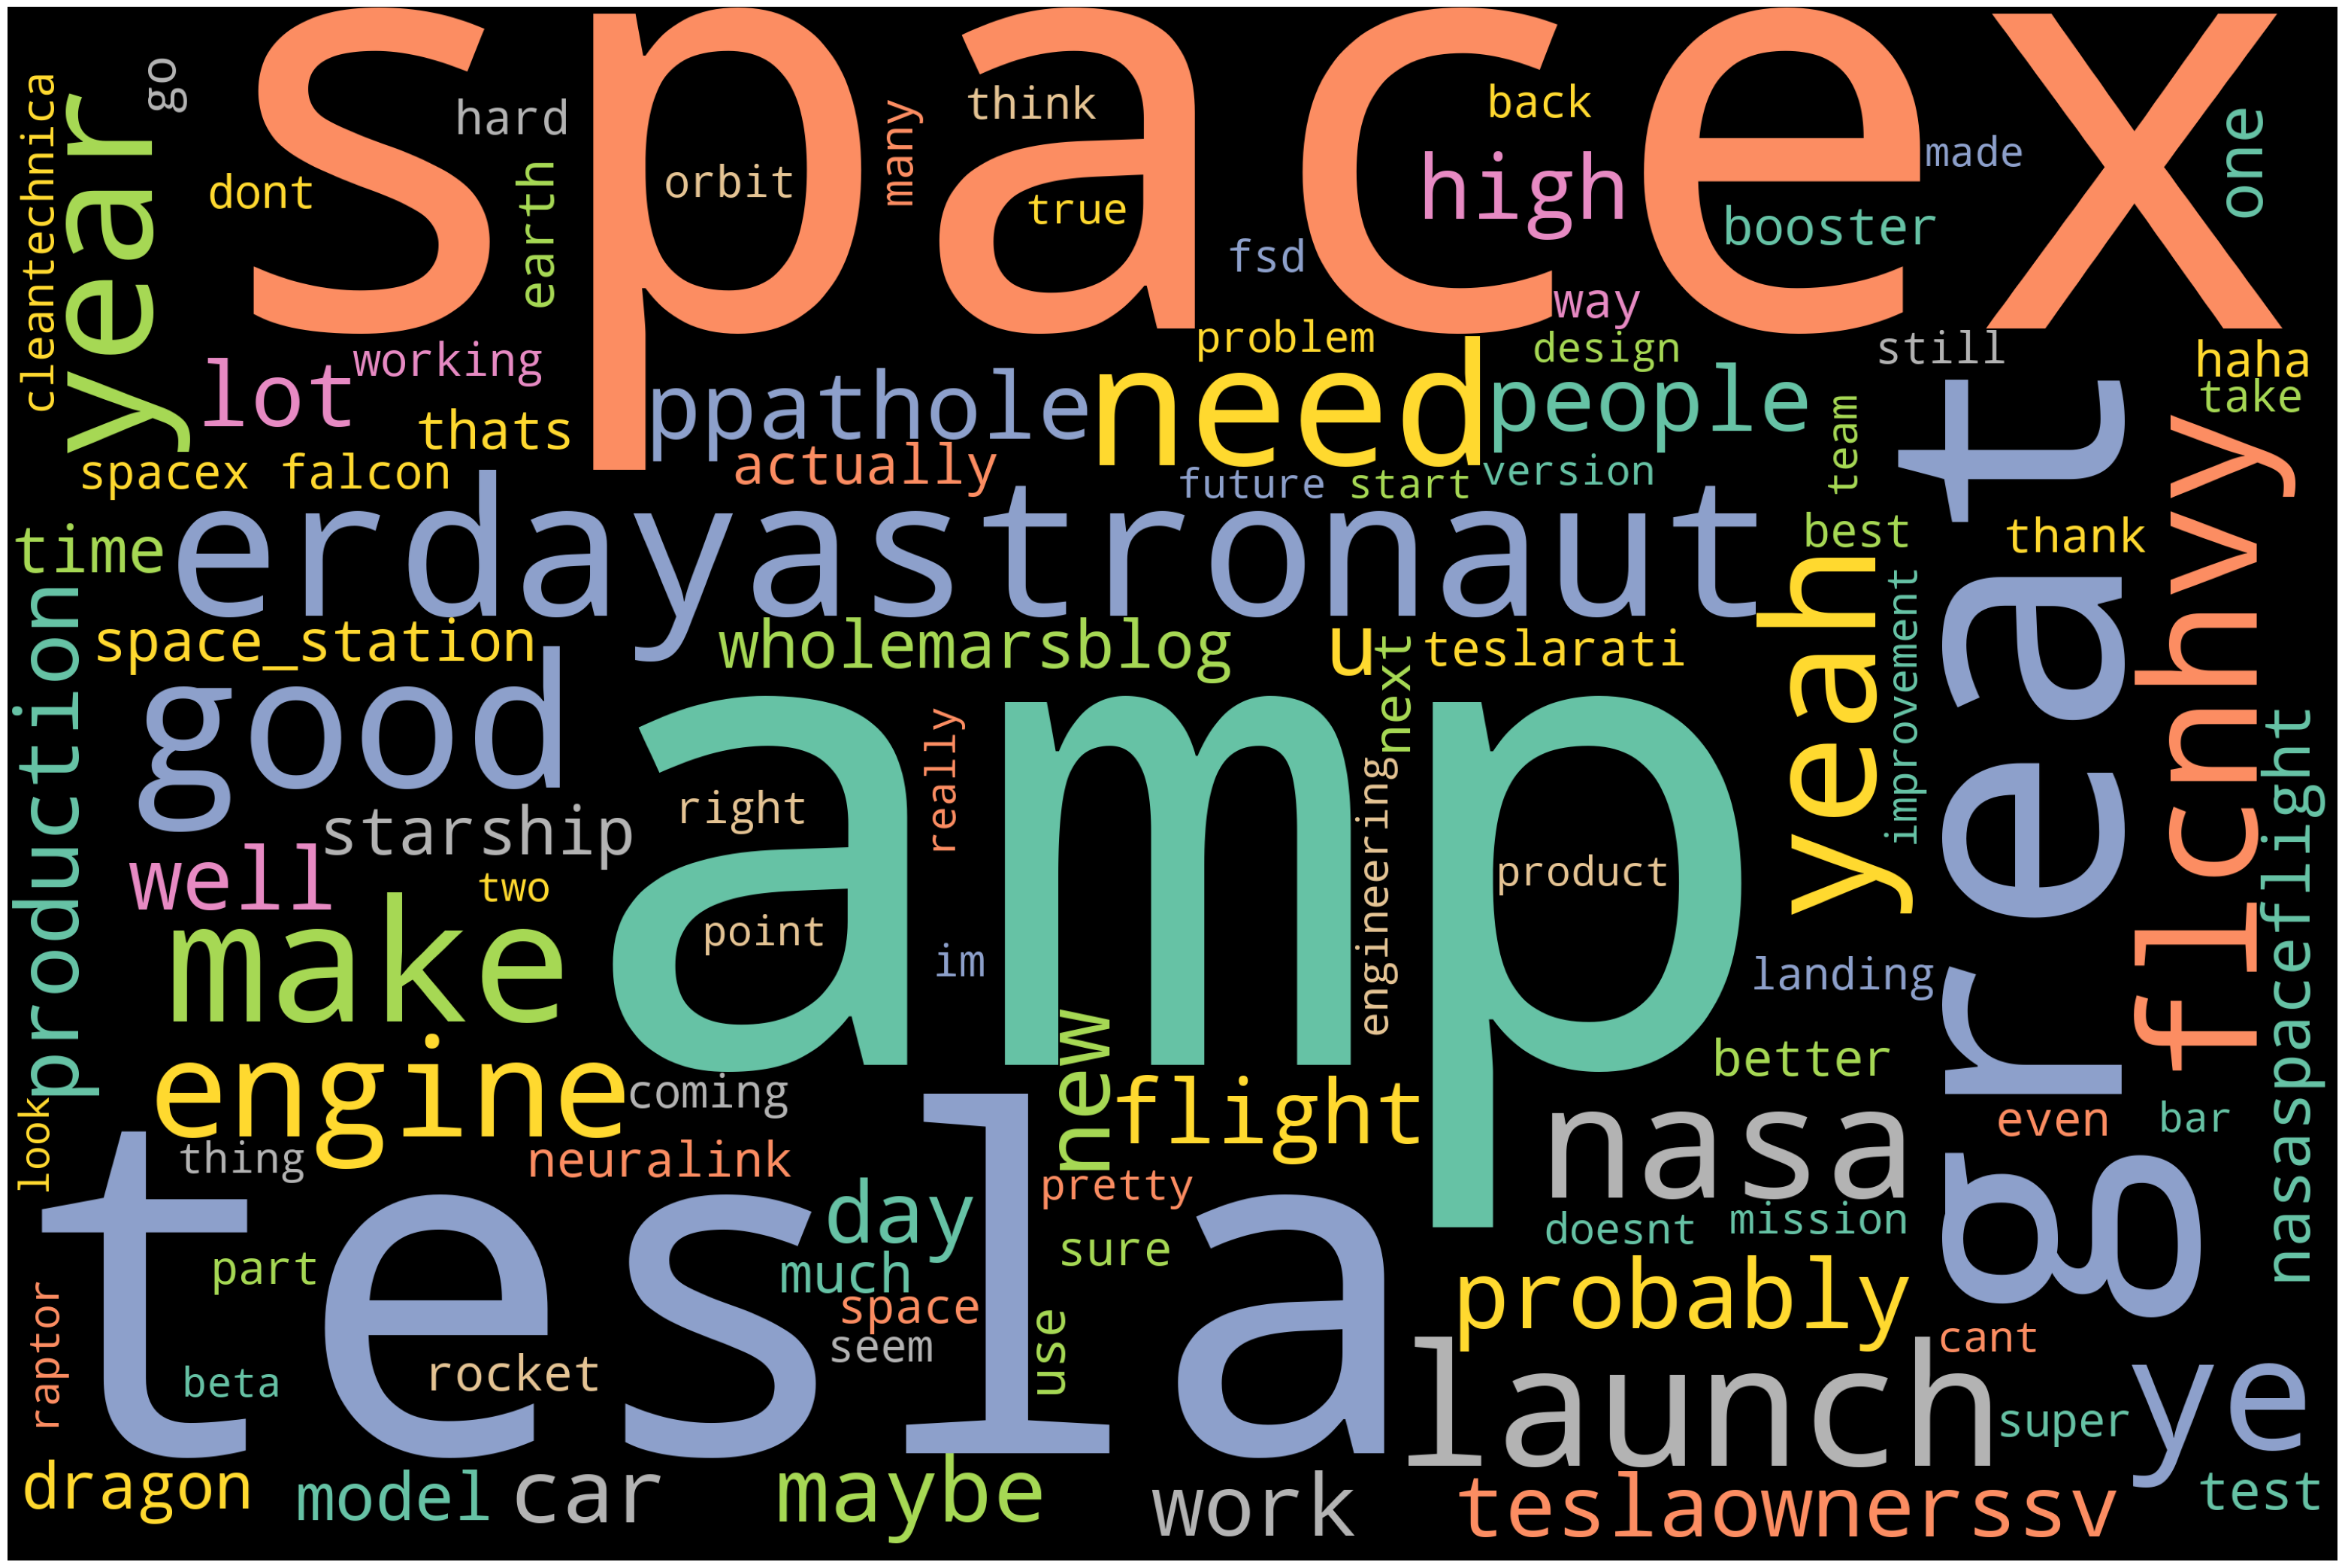

In [141]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(tweets)
# Plot
plot_cloud(wordcloud)

### Sentiment analysis

In [142]:
! pip install vaderSentiment

In [143]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [144]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [145]:
def vader_sentiment(text):
    analyser=SentimentIntensityAnalyzer()
    return analyser.polarity_scores(text)['compound']

In [146]:
data['vader_sentiment']=data['Text'].apply(vader_sentiment)

In [147]:
data[['Text','vader_sentiment']].head()

,Text,vader_sentiment
0,kunalb11 im alien,0.0000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.0000
2,joerogan spotify great interview,0.6249
3,gtera27 doge underestimated,-0.2732
4,teslacn congratulations tesla china amazing ex...,0.8271


In [148]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
data['sentiment']=data['vader_sentiment'].apply(getAnalysis)
data[['Text','sentiment','vader_sentiment']]

,Text,sentiment,vader_sentiment
0,kunalb11 im alien,Neutral,0.0000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,Neutral,0.0000
2,joerogan spotify great interview,Positive,0.6249
3,gtera27 doge underestimated,Negative,-0.2732
4,teslacn congratulations tesla china amazing ex...,Positive,0.8271
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,Neutral,-0.0000
1995,ppathole make sure read ur terms amp condition...,Positive,0.5994
1996,teslagong ppathole samwise gamgee,Neutral,0.0000
1997,ppathole altho dumb dumber u0001f525u0001f525,Negative,-0.7003


In [149]:
count=data['sentiment'].value_counts()
count

Positive    901
Neutral     900
Negative    198
Name: sentiment, dtype: int64

In [150]:
data[['Text','sentiment','vader_sentiment']]

,Text,sentiment,vader_sentiment
0,kunalb11 im alien,Neutral,0.0000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,Neutral,0.0000
2,joerogan spotify great interview,Positive,0.6249
3,gtera27 doge underestimated,Negative,-0.2732
4,teslacn congratulations tesla china amazing ex...,Positive,0.8271
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,Neutral,-0.0000
1995,ppathole make sure read ur terms amp condition...,Positive,0.5994
1996,teslagong ppathole samwise gamgee,Neutral,0.0000
1997,ppathole altho dumb dumber u0001f525u0001f525,Negative,-0.7003


#### Visualizing 

<BarContainer object of 3 artists>

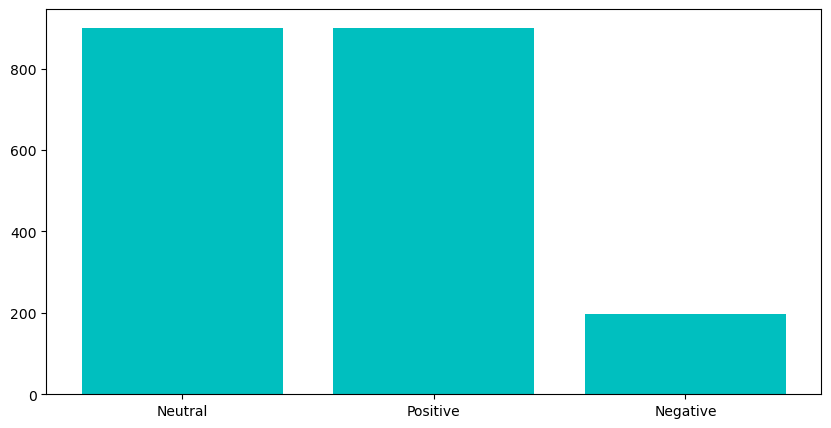

In [153]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[900,901,198]
senti=['Neutral','Positive','Negative']
plt.bar(senti,count,color='c')

##### from above we can say the tweets are mostly neutral,positive and a few are negative.